# SHAP

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from src.config import Config
from src.evaluation import SHAPExplainer
from src.train import ModelTrainer

In [2]:
cfg = Config(Path("../config/config.yaml"))

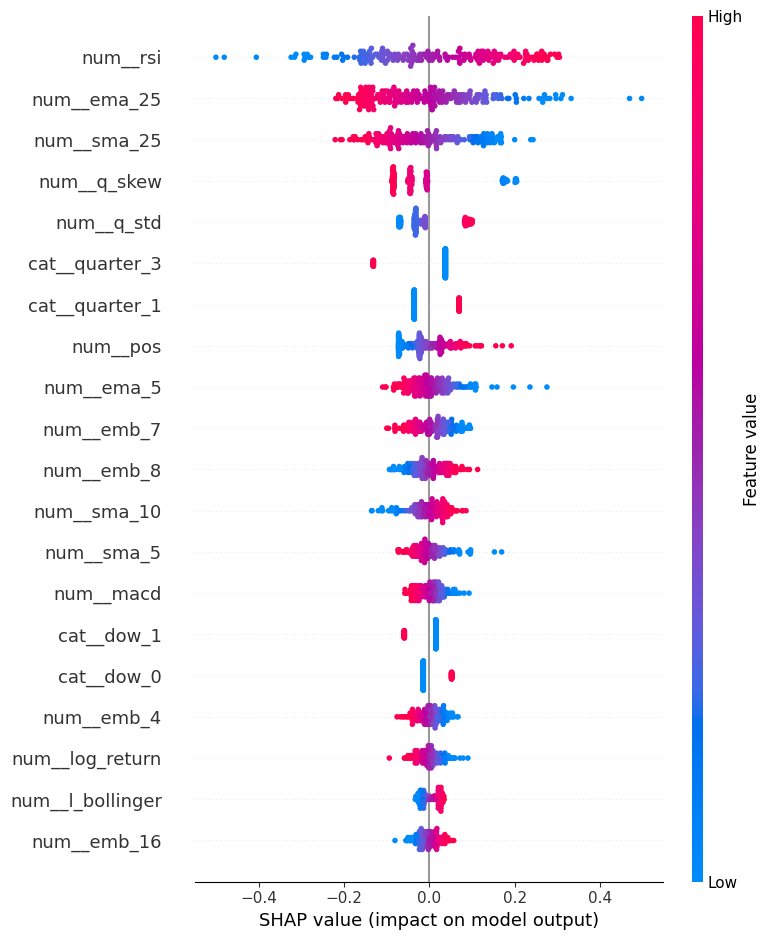

In [3]:
model_path = Path(cfg.model.path_dir) / cfg.model.enet_mo_best_30
model, preprocessor, y_scaler, _ = ModelTrainer.load(str(model_path))

X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test_30.parquet")
X_test_proc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

explainer = SHAPExplainer(
    model=model,
    preprocessor=preprocessor,
    background_data=X_test.sample(n=100, random_state=cfg.runtime.seed),
    mode="linear",
)

shap_values = explainer.explain(X_test)

shap.summary_plot(
    shap_values[0],
    X_test_proc,
    feature_names=feature_names,
    show=True
)

In [4]:
X_proc = preprocessor.transform(X_test)
y_pred_scaled = model.predict(X_proc)
print("Y scaled prediction std dev per target:\n", np.std(y_pred_scaled, axis=0))

Y scaled prediction std dev per target:
 target_0     0.187105
target_1     0.147166
target_2     0.174650
target_3     0.159090
target_4     0.146280
target_5     0.160806
target_6     0.185160
target_7     0.188144
target_8     0.220321
target_9     0.176589
target_10    0.193866
target_11    0.184691
target_12    0.182646
target_13    0.171487
target_14    0.143901
target_15    0.171210
target_16    0.183619
target_17    0.187731
target_18    0.189072
target_19    0.168779
target_20    0.162693
target_21    0.163830
target_22    0.164059
target_23    0.154217
target_24    0.146693
target_25    0.138105
target_26    0.148358
target_27    0.131311
target_28    0.181580
target_29    0.153050
dtype: float64


In [5]:
print("Feature std dev after preprocessing:\n", X_proc.std(axis=0))

Feature std dev after preprocessing:
 [1.07355278 0.9824719  0.93533912 0.94835979 0.56693754 0.66248607
 0.8703808  1.02727074 0.88175627 1.03208572 0.90666922 0.96330029
 0.7365295  0.99776259 1.05295954 0.6585203  0.68512481 0.73859238
 0.91970761 0.90187236 1.13765999 0.8241867  1.08421387 1.49906643
 0.20476595 0.27327896 0.82116894 0.89568845 0.88887764 0.81445621
 0.90637367 0.90968918 0.82153045 1.02309454 0.95037045 0.05945895
 0.37048762 0.74565104 0.39287008 0.4045653  0.4045653  0.4045653
 0.39287008 0.46428966 0.38453055 0.3801874  0.47017543]


In [6]:
shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
print("SHAP mean abs:\n", np.mean(np.abs(shap_array), axis=0))

SHAP mean abs:
 [0.04185013 0.00465214 0.         0.         0.00394657 0.01814682
 0.00512351 0.00499334 0.02162776 0.01477811 0.01311145 0.03432873
 0.03318888 0.00456333 0.01588989 0.01830515 0.00464954 0.0094764
 0.00267935 0.00387689 0.01963992 0.02022349 0.14403524 0.02491665
 0.01640443 0.01990293 0.01701842 0.0268233  0.04127751 0.00567639
 0.03210994 0.         0.00117618 0.08768556 0.11157631 0.00729191
 0.05515947 0.07547974 0.02171455 0.02392269 0.         0.
 0.00883445 0.046324   0.01958307 0.05373821 0.00179806]
